For an online store of computer games, it is necessary to conduct a market analysis, identify patterns that determine the success of games, determine user profiles for each region. This will allow you to be able to place a bet on a potentially popular product and plan advertising campaigns, helping to develop the store’s business.

The data is collected from https://www.kaggle.com/datasets?search=video+game+sales. 
Description of video_games_sales.csv data:
Name - the name of the game
Platform - platform
Year — year of release
Genre - game genre
Publisher - game maker
NA_sales - sales in North America (millions of dollars)
EU_sales - sales in Europe (millions of dollars)
JP_sales - sales in Japan (millions of dollars)
Other_sales - sales in other countries (millions of dollars)


In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Let's read the games.csv file and save it in the df variable.

In [3]:
df = pd.read_csv('video_games_sales.csv')

In [4]:
df.head(10)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [30]:
# get general information about the data in the df table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16309 entries, 0 to 16308
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16309 non-null  int64  
 1   name          16309 non-null  object 
 2   platform      16309 non-null  object 
 3   year          16309 non-null  int64  
 4   genre         16309 non-null  object 
 5   publisher     16309 non-null  object 
 6   na_sales      16309 non-null  float64
 7   eu_sales      16309 non-null  float64
 8   jp_sales      16309 non-null  float64
 9   other_sales   16309 non-null  float64
 10  global_sales  16309 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


let's convert the year value from float to integer.

In [29]:
df['year'] = df['year'].apply(np.int64)

let's check for null values 

In [7]:
df.duplicated().sum()

0

There are no duplicate values. Check for null values

In [6]:
df.isnull().sum()

rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

Handling missing data in 'year_of_release' column

Let's look at the missing data in the year_of_release column

In [10]:
df[df['year'].isna()]

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


We do not have release year data for 271 games.
Note that some of the lines in the game title have the year of release. It can be used as a replacement for missing data for the year column

Let's search for such strings and create a dictionary where the key will be the index of the string in which the year of release is present in the game name itself, and the value will be the year of release itself.

In [12]:
x_year = {} # create an empty dictionary

# iterate over rows with no year information
for row in df[df['year'].isna()].itertuples():
    for item in row.name.split(' '):  # split the game name into separate words
        if item == row.name.split(' ')[-1]:  # take the last word from the list
            try:  # if the last word is a number then
                if len(item) == 2 or len(item) == 4: # check its "length"
                    item = int(item)  # convert the data type
                    if item < 21:  # convert the years of this century to the full date
                        item += 2000
                    elif item > 80 and item < 100: # convert the years of the last century to the full date
                        item += 1900
                    if item >= 1980:  # 1980 is the minimum year value in our data
                        x_year[row.Index] = item
            except:  # if the last word is not a number then continue to iterate over the lines
                continue
            
            
#check the resulting dictionary by displaying it on the screen
for key, value in x_year.items():
    print(f'index: {key: <5} | year:{value: >5}')

index: 179   | year: 2004
index: 377   | year: 2004
index: 470   | year: 2006
index: 1303  | year: 1999
index: 1649  | year: 2003
index: 2484  | year: 2007
index: 2776  | year: 2011
index: 3421  | year: 2006
index: 3501  | year: 2002
index: 4199  | year: 2007
index: 4797  | year: 2003
index: 5162  | year: 2003
index: 5669  | year: 2005
index: 5901  | year: 2003
index: 8929  | year: 2005
index: 12922 | year: 2011
index: 13870 | year: 2006
index: 15739 | year: 2007
index: 15865 | year: 2008
index: 16057 | year: 2008


replace the missing values with those obtained from the names of the games of the year.

In [13]:
for key, v in x_year.items():
    df.loc[key, 'year'] = v

let's check how many of the year column still dont have an input.

In [14]:
df[df['year'].isna()]

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.0,0.29,3.17
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.0,0.03,2.53
624,625,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.0,0.21,2.48
649,650,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.0,0.07,2.39
652,653,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.54,0.63,0.0,0.22,2.39
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.0,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.0,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.0,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.0,0.00,0.01


There are 251 entries in the year column without information less than the initial 271. We could look for the information on the internet to fill it out but as 251 represnts less than 2% of our dataset. We will drop it instead.

In [15]:
df = df.dropna(subset=['year']).reset_index(drop=True)

In [17]:
df.isnull().sum()

rank             0
name             0
platform         0
year             0
genre            0
publisher       38
na_sales         0
eu_sales         0
jp_sales         0
other_sales      0
global_sales     0
dtype: int64

we have 38 publishers without entries we will also drop those ones 

In [18]:
df = df.dropna(subset=['publisher']).reset_index(drop=True)

In [19]:
df.isnull().sum()

rank            0
name            0
platform        0
year            0
genre           0
publisher       0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
global_sales    0
dtype: int64

In [43]:
games_per_year = df.groupby('year', as_index=False).name \
                   .count() \
                   .rename(columns={'name': 'number_of_games'})

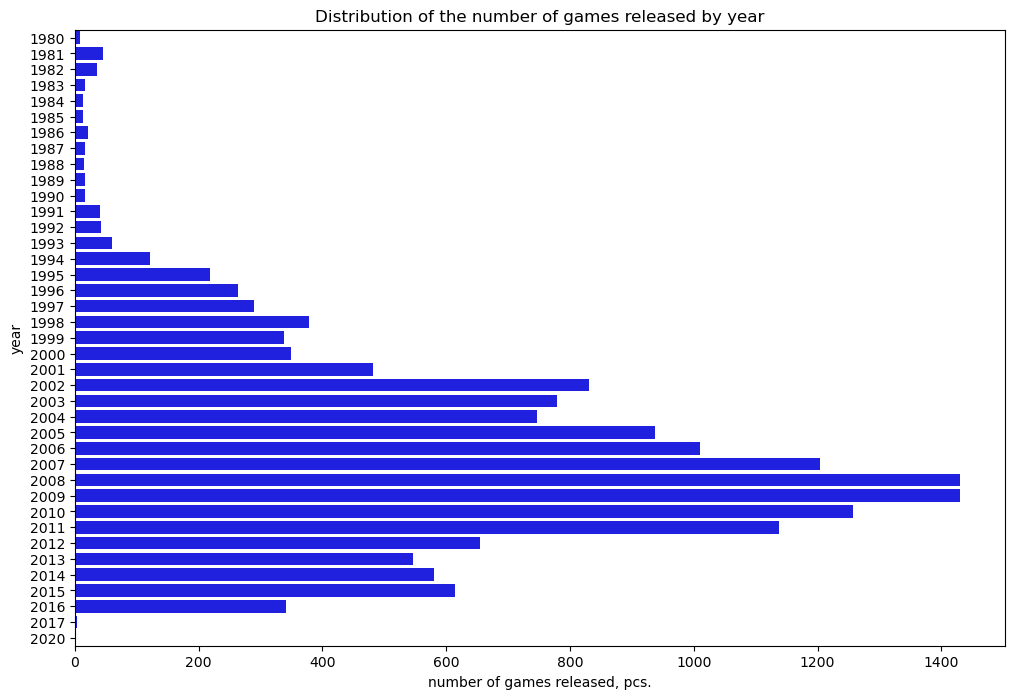

In [44]:
# figure size
plt.figure(figsize=(12, 8))

# setting parameters for plotting a graph
ax = sns.barplot(y=games_per_year.year,
                 x=games_per_year.number_of_games,
                 orient='h',
                 color='blue'
                 );

# axis labels and titles
plt.xlabel('number of games released, pcs.')
plt.title('Distribution of the number of games released by year');

The graph shows that the bulk of games were released in the first decade of the twenty-first century, with a peak in 2008-2009. After 2011, there was a significant decline in the number of games released (the rise in popularity of social networks?).



Let's estimate the cumulative percentage of the number of released games

In [46]:
# calculate the percentage for a specific year
games_per_year['prcnt'] = 100 * games_per_year.number_of_games / games_per_year.number_of_games.sum()
# calculate the cumulative percentage
games_per_year['prcnt_sum'] = games_per_year.prcnt.expanding(1).sum()

# visualization of results
games_per_year



,year,number_of_games,prcnt,prcnt_sum
0,1980,9,0.055184,0.055184
1,1981,46,0.282053,0.337237
2,1982,36,0.220737,0.557974
3,1983,17,0.104237,0.662211
4,1984,14,0.085842,0.748053
5,1985,14,0.085842,0.833895
6,1986,21,0.128763,0.962659
7,1987,16,0.098105,1.060764
8,1988,15,0.091974,1.152738
9,1989,17,0.104237,1.256975


Building a cumulative chart of the percentage of games released.

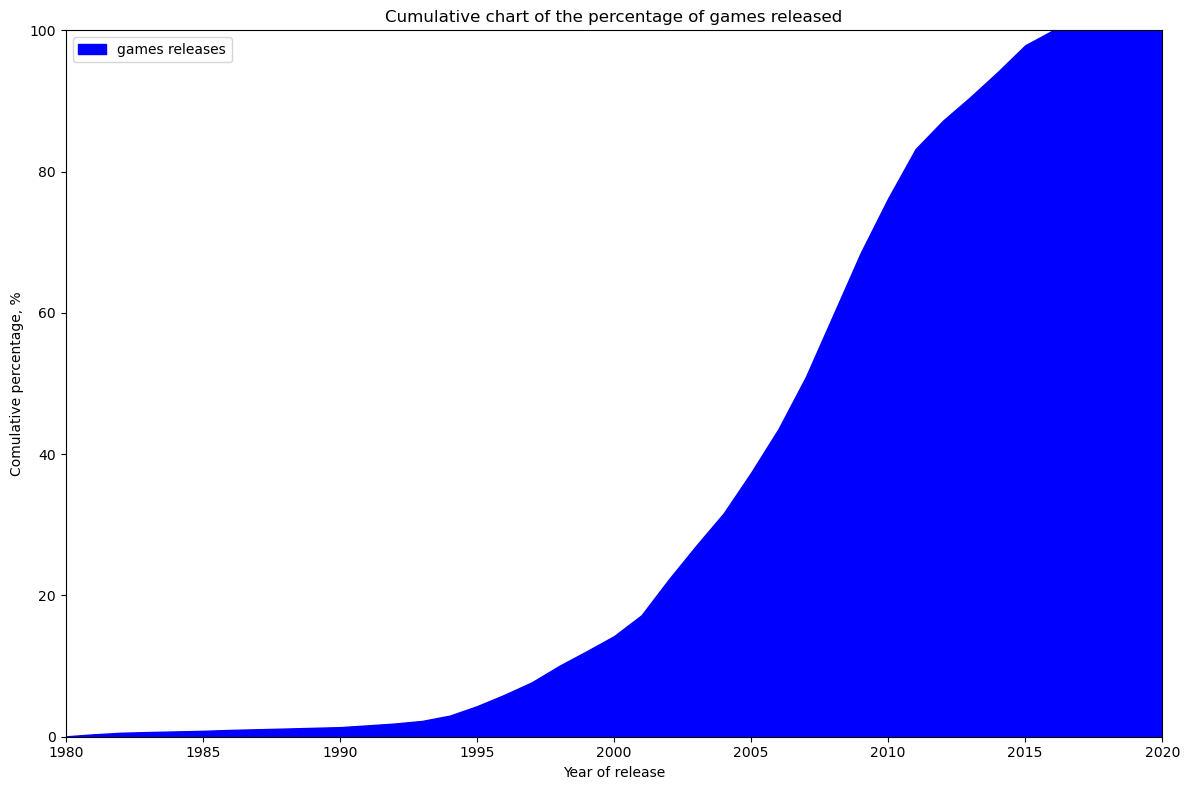

In [47]:
# data conversion
rnd = np.asarray(games_per_year.loc[:, 'prcnt_sum'].to_list())
yrs = np.asarray(games_per_year.loc[:, 'year'].to_list())

# building and designing a graph
fig, ax = plt.subplots(figsize=(12, 8))
ax.stackplot(yrs, rnd, labels=['games releases'], color='blue')
ax.set_title('Cumulative chart of the percentage of games released')
ax.legend(loc='upper left')
ax.set_xlabel('Year of release')
ax.set_ylabel('Comulative percentage, %')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
ax.set_ylim(ymin=0, ymax=100)
fig.tight_layout()
 
plt.show();

According to the data obtained, it is clearly seen that during the first half of the period presented (from 1983 to 1999), about 11% of the total number of games released were released, and during the second half, the remaining 89%. Half of the games released were released between 2007 and 2020. 

Let's look at the dynamics of total sales.

In [48]:
# get the required data slice
df_sales = df.groupby('year', as_index=False) \
    .agg({'global_sales': 'sum'}) \
    .sort_values('global_sales', ascending=False)

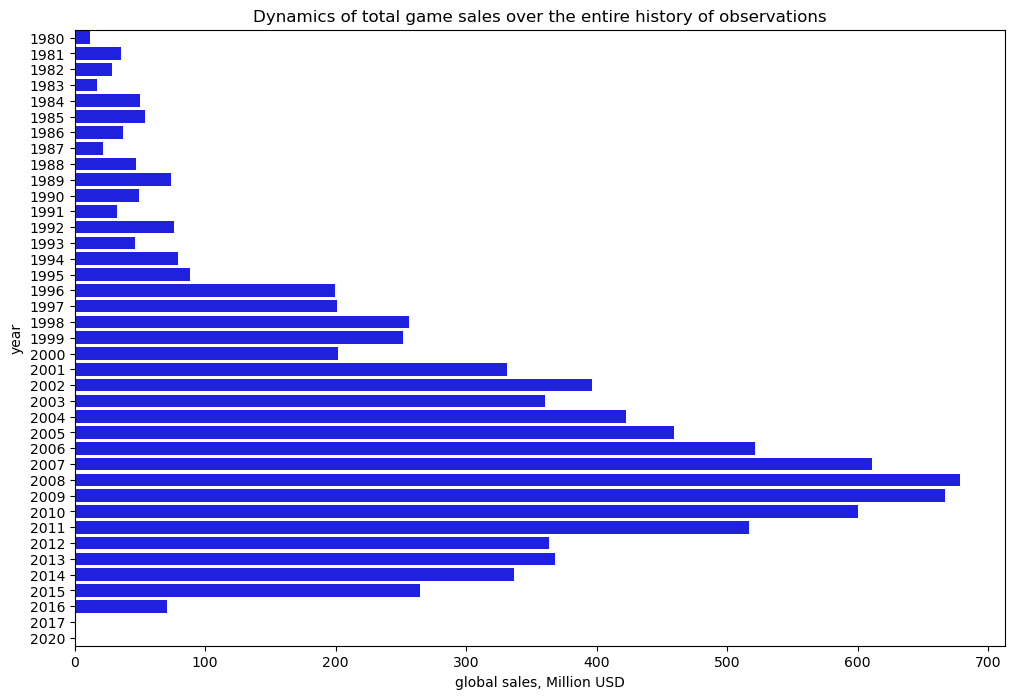

In [49]:
# figure size
plt.figure(figsize=(12, 8))

# setting parameters for plotting a graph
ax = sns.barplot(y=df_sales.year,
                 x=df_sales.global_sales,
                 orient='h',
                 color='blue');

# axis labels and titles
plt.xlabel('global sales, Million USD')
plt.title('Dynamics of total game sales over the entire history of observations');

In [51]:
# calculate the percentage for a specific year
games_per_year['prcnt'] = 100 * games_per_year.number_of_games / games_per_year.number_of_games.sum()
# calculate the cumulative percentage
games_per_year['prcnt_sum'] = games_per_year.prcnt.expanding(1).sum()

# visualization of results
games_per_year

,year,number_of_games,prcnt,prcnt_sum
0,1980,9,0.055184,0.055184
1,1981,46,0.282053,0.337237
2,1982,36,0.220737,0.557974
3,1983,17,0.104237,0.662211
4,1984,14,0.085842,0.748053
5,1985,14,0.085842,0.833895
6,1986,21,0.128763,0.962659
7,1987,16,0.098105,1.060764
8,1988,15,0.091974,1.152738
9,1989,17,0.104237,1.256975


We can see that the dynamics of overall sales generally closely follows the dynamics of the release of new games, with a peak occurring in 2008-2009 and a subsequent decline to the values of the early 2000s, when the computer games industry was at the beginning of its rise.

Next, let's look at the distribution of sales across platforms. Let’s identify platforms that were fashionable in the past and popular today. Let's evaluate the life cycle of platforms.

In [ ]:
Change in sales by platform

In [52]:
# counting sales grouped by platform
plt_sales = df.groupby('platform', as_index=False).agg({'global_sales': 'sum'}) \
    .sort_values('global_sales', ascending=False)

# output the result
plt_sales

,platform,global_sales
16,PS2,1244.16
28,X360,970.26
17,PS3,949.35
26,Wii,911.02
4,DS,818.93
15,PS,727.39
6,GBA,305.62
19,PSP,292.55
18,PS4,278.10
13,PC,254.70


<Figure size 1200x800 with 0 Axes>

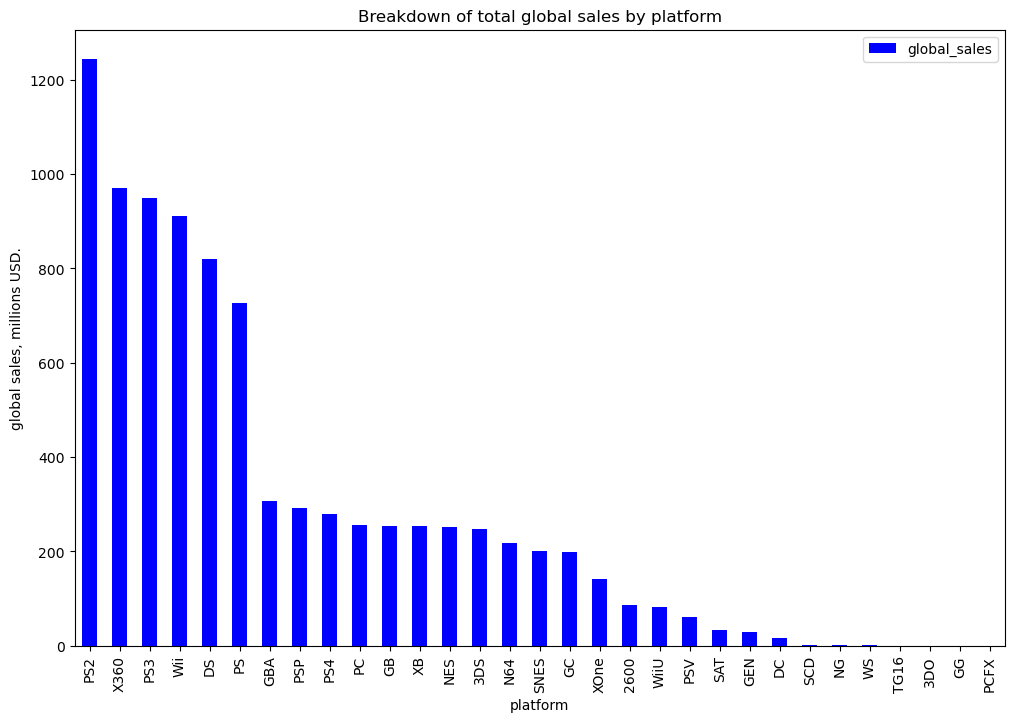

In [53]:
# figure size
plt.figure(figsize=(12, 8))

# setting parameters for plotting a graph
plt_sales.plot(x='platform',
               y='global_sales',
               kind='bar',
               figsize=(12, 8),
               title='Breakdown of total global sales by platform',
               color='blue');

# set the y-axis label
plt.ylabel('global sales, millions USD.');

We can clearly see that the leaders in total global sales are: PS2, X360, PS3, Wii, DS, PS. There is a gap of 2-4 times compared to the next revenue platform PS4. Data from the top 6 platforms is the main contender for further detailed analysis. 

To assess the dynamics of platform popularity over the years, we will select platforms whose total sales exceed the median value, i.e. Let's take the first half of the list ranked by global sales volumes.

In [54]:
# create a list of platform names with total global sales greater than the median value
platforms_above_median = []

for row in plt_sales.itertuples(): # iterate over the dataframe
    if row.global_sales > plt_sales.global_sales.median(): # compare sales values with median
        platforms_above_median.append(row.platform) # add the platform name to the list

# checking the result (listing platform names)
platforms_above_median

['PS2',
 'X360',
 'PS3',
 'Wii',
 'DS',
 'PS',
 'GBA',
 'PSP',
 'PS4',
 'PC',
 'GB',
 'XB',
 'NES',
 '3DS',
 'N64']

In [55]:
# grouping data by year and platform and calculating total global sales
plt_sales_year = df.query('platform in @platforms_above_median') \
    .groupby(['year', 'platform'], as_index=False) \
    .agg({'global_sales': 'sum'}) \
    .sort_values('year', ascending=True)

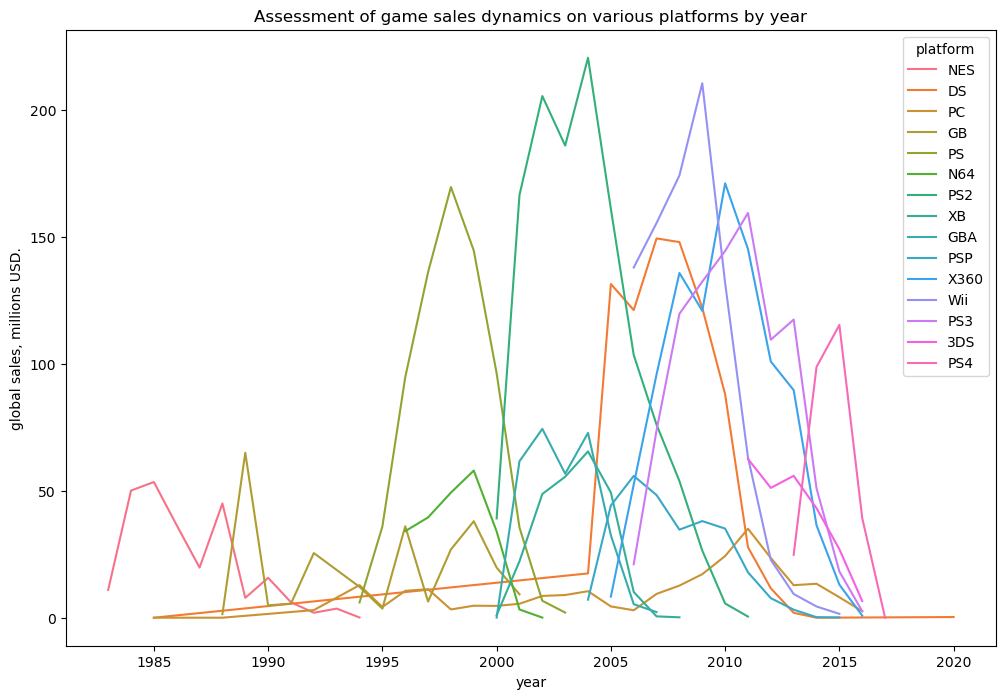

In [57]:
# figure size
plt.figure(figsize=(12, 8))

# chart parameters
sns.lineplot(x=plt_sales_year.year,
             y=plt_sales_year.global_sales,
             hue=plt_sales_year.platform);

# set the y-axis label
plt.ylabel('global sales, millions USD.');
plt.title('Assessment of game sales dynamics on various platforms by year');

Let's build a distribution graph of the life cycle of platforms. Let's look at the main statistics of the resulting indicator.

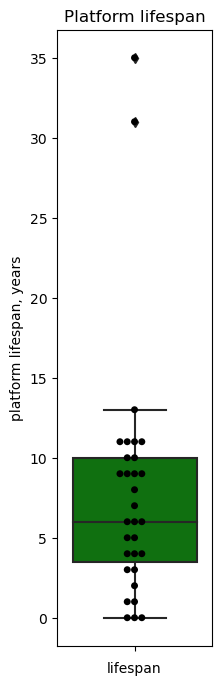

In [58]:
# calculate the lifespan of the platform
life_span = df.groupby('platform').year.max() - df.groupby('platform').year.min()

# mark the space for displaying graphs
fig, (ax1) = plt.subplots(
    nrows=1, ncols=1,
    figsize=(2, 8)
)

# plotting and design (boxplot + value points (swarmplot))
sns.boxplot(y=life_span, color='green', ax=ax1)
sns.swarmplot(y=life_span, color='black')

# axes labels and graph title
ax1.set_title('Platform lifespan')
ax1.set_xlabel('lifespan')
ax1.set_ylabel('platform lifespan, years');

The graph shows that there are two outliers; otherwise, most of the data fits within the interquartile range. Due to the presence of outliers, we will use the median value (6 years) when we talk about the average value of the platform life cycle.

In [59]:
# basic platform life cycle statistics
life_span.describe()

count    31.000000
mean      7.870968
std       7.714670
min       0.000000
25%       3.500000
50%       6.000000
75%      10.000000
max      35.000000
Name: year, dtype: float64

The graphs clearly show that the average life cycle of the platform is 6 years (the only exceptions are PC and DS). We also see that the overall sales leader PS2 has already completely exhausted itself and its last sales were in 2011 (Assessment of game sales dynamics on various platforms by year graph). Therefore, selecting data based on the size of sales throughout history will be incorrect for our purposes. We will greatly distort the results of our research if we do this. Therefore, we will accept another criterion for our sample: we will take half the value of the third quartile (5 years). Thus, our sample will include both platforms at the peak of popularity, as well as new emerging platforms that will be popular in the future.

In [69]:
# grouping platform data for the last 5 years by year and platform and calculating total global sales
plt_sales_5year = df.query('year >= 2012 and year <= 2016') \
    .groupby(['year', 'platform'], as_index=False) \
    .agg({'global_sales': 'sum'}) \
    .sort_values('year', ascending=True)

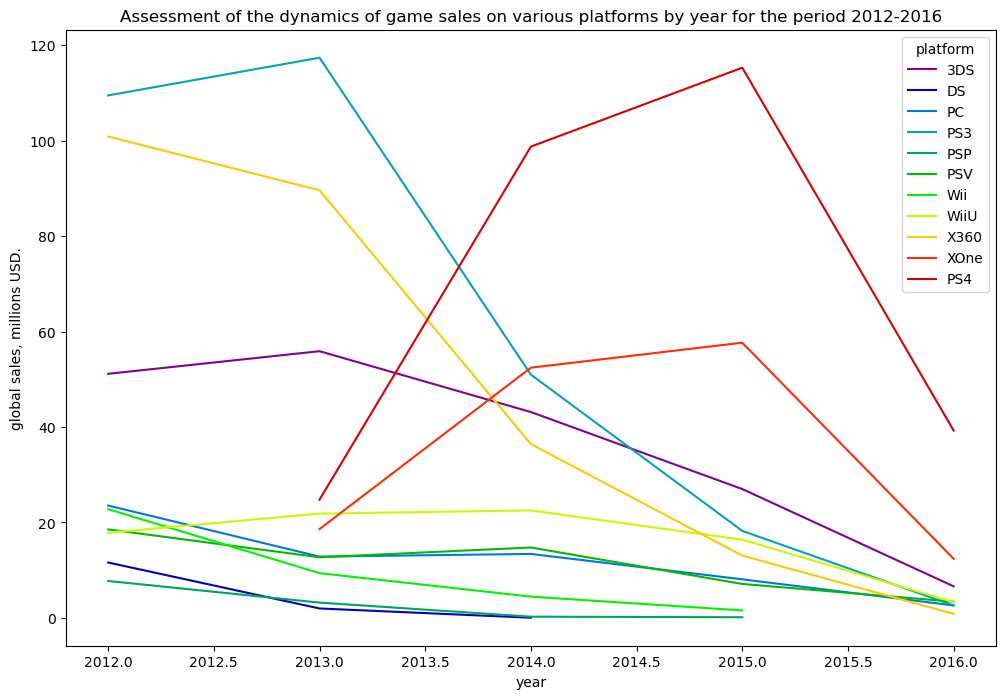

In [73]:
# figure size
plt.figure(figsize=(12, 8))

# chart parameters
sns.lineplot(x=plt_sales_5year.year,
             y=plt_sales_5year.global_sales,
             hue=plt_sales_5year.platform,
             legend='full',
             palette='nipy_spectral');

# set the y-axis label
plt.ylabel('global sales, millions USD.');
plt.title('Assessment of the dynamics of game sales on various platforms by year for the period 2012-2016');

Using the graph above we can say that at the moment only two platforms are still growing and promising: PS4 and XOne. The 3DS still has some remaining popularity. Game sales on other platforms are insignificant or approaching zero. Therefore, at this stage of the research we will continue to work with these three platforms: PS4, XOne, 3DS.

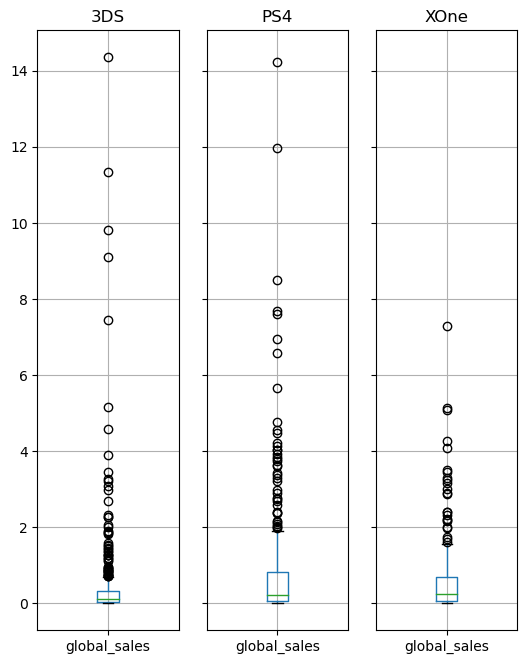

In [74]:
# list of names of the three most relevant platforms
popular_platforms = ['PS4', 'XOne', '3DS']

# we select by platform name and year
df_3p = df.query('platform in @popular_platforms & year > 2011 and year <= 2016') \
          .reset_index(drop=True)
# building a boxplot type graph (global sales broken down by platform)
df_3p.groupby(['platform']).boxplot(column='global_sales',
                                    figsize=(6, 8),
                                    layout=(1, 3));

Additionally, we will obtain the main statistical indicators of our cross-section

In [75]:
# get descriptive statistics
df_3p.groupby(['platform']).global_sales.describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,383.0,0.479739,1.345011,0.01,0.045,0.11,0.31,14.35
PS4,335.0,0.830060,1.620798,0.01,0.060,0.22,0.82,14.24
XOne,213.0,0.662254,1.039298,0.01,0.070,0.24,0.68,7.30


From the resulting graph we can observe that the average values for all platforms are approximately the same. We can also say from the presence of a large number of outliers on the graphs of all platforms that the main revenue comes from a small number of hit games. Their sales are 11-20 times higher than the average of total sales. Moreover, there are more such hit games, both in total number and in the amplitude of the observed effect, on the 3DS and PS4 platforms.

In [76]:
#Let's find the game with the highest global sales for each platform.

# select indexes
df_3p.groupby(['platform']).global_sales.idxmax()

platform
3DS      0
PS4      1
XOne    10
Name: global_sales, dtype: int64

In [78]:
# display the best-selling games based on selected indices
df_3p.iloc[[1, 0, 10]]

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
1,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
0,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35
10,102,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,4.52,2.09,0.01,0.67,7.30


For the PS4 and XOne platforms, the best-selling game was 'Call of Duty: Black Ops 3 (2015)', while for the 3DS this game was 'Pokemon X/Pokemon Y' from 2013, which confirms the thesis that the popularity of this game has declined over time.

Next, let's look at the general distribution of games by genre for this platforms starting from 2012.

In [79]:
# grouping by genre, sorting and retrieving data
genres_sales_all = df_3p.groupby(['genre'], as_index=False).agg({'global_sales': 'sum'}).sort_values('global_sales', ascending=False)

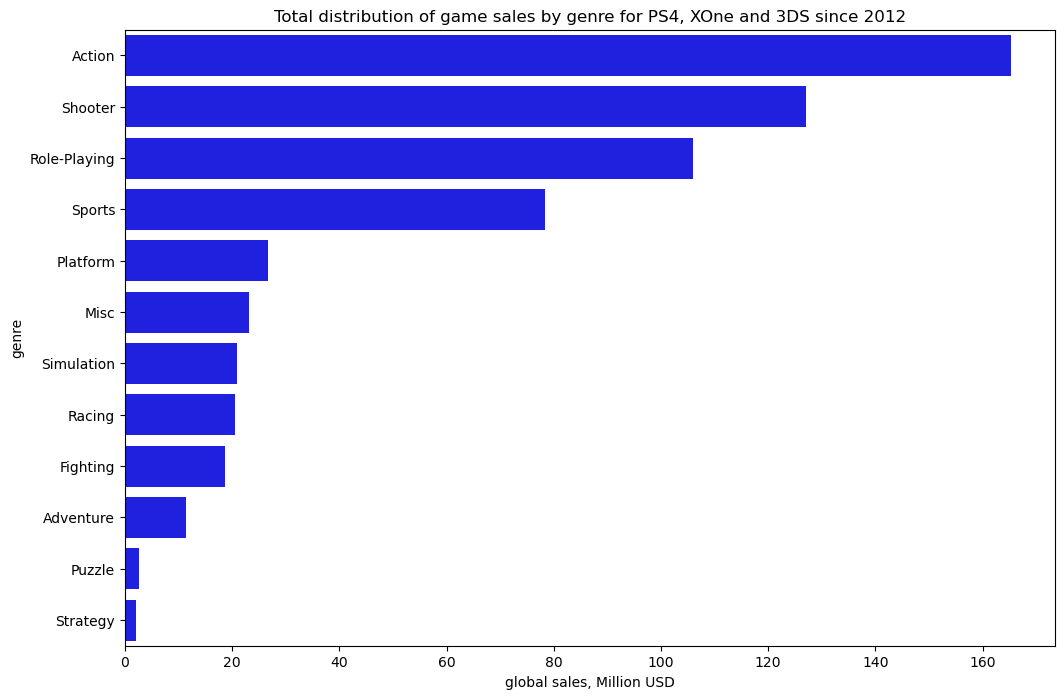

In [81]:
# figure size
plt.figure(figsize=(12, 8))

# setting parameters for plotting a graph
ax = sns.barplot(y=genres_sales_all.genre,
                 x=genres_sales_all.global_sales,
                 orient='h',
                 color='blue',
                 ci=None);

# axis labels and titles
plt.xlabel('global sales, Million USD')
plt.title('Total distribution of game sales by genre for PS4, XOne and 3DS since 2012');

The most popular genres are Action, Shooter and Role-Playing. The fourth place is occupied by the Sports genre. Sales for other games differ significantly. Sales of games in the most unpopular genres (Puzzle and Strategy) differs more than a hundredfold compared to the most popular genres.

Let's look at the popularity of genres broken down by platform.

In [82]:
# grouping by genres and platforms, sorting and retrieving data
genres_sales = df_3p.groupby(['genre', 'platform'], as_index=False).agg({'global_sales': 'sum'}).sort_values('global_sales', ascending=False)

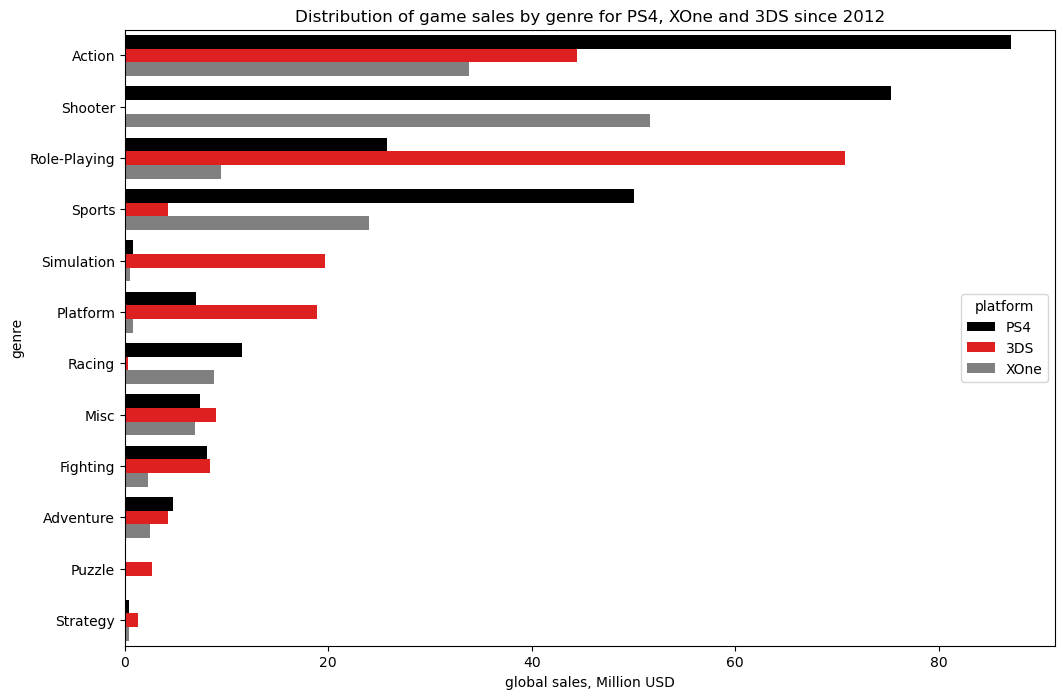

In [83]:
# figure size
plt.figure(figsize=(12, 8))

# setting parameters for plotting a graph
ax = sns.barplot(y=genres_sales.genre,
                 x=genres_sales.global_sales,
                 orient='h',
                 color='blue',
                 palette=['black', 'red', 'grey'],
                 hue=genres_sales.platform,
                 hue_order=['PS4', '3DS', 'XOne']
                 );

# axis labels and titles
plt.xlabel('global sales, Million USD')
plt.title('Distribution of game sales by genre for PS4, XOne and 3DS since 2012');

It is interesting to note that the 3DS platform stands out in terms of genre preferences. For example, the Shooter genre is not at all popular on it, while Role-Playing takes first place by a wide margin. The Sports genre (4th place in the overall ranking) is the most popular among PS4 users.

# Conclusions

At this stage, exploratory data analysis was carried out. The number of games released in different periods is definite (half of the games presented were released from 2007 to 2016).

The average life cycle of the popularity of gaming platforms is noted (about 6 years).
The three most relevant platforms at the moment and in terms of prospects for the next few years have been identified (PS4, XOne, 3DS).

We will next determine the number of users for each region on the most popular platforms, the most popular genres.

Let's take the most current data, making a sample for the last 5 years (starting from 2012).

In [85]:
# select data for the last five years
df_4 = df[df['year'] > 2011].reset_index(drop=True)

Let's determine the popularity of platforms by region.

In [86]:
# get the required data slice
df_4_region = df_4[['platform', 'na_sales', 'eu_sales', 'jp_sales']] \
    .groupby('platform', as_index=False) \
    .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
    .melt(id_vars=['platform']) \
    .sort_values('value', ascending=False)

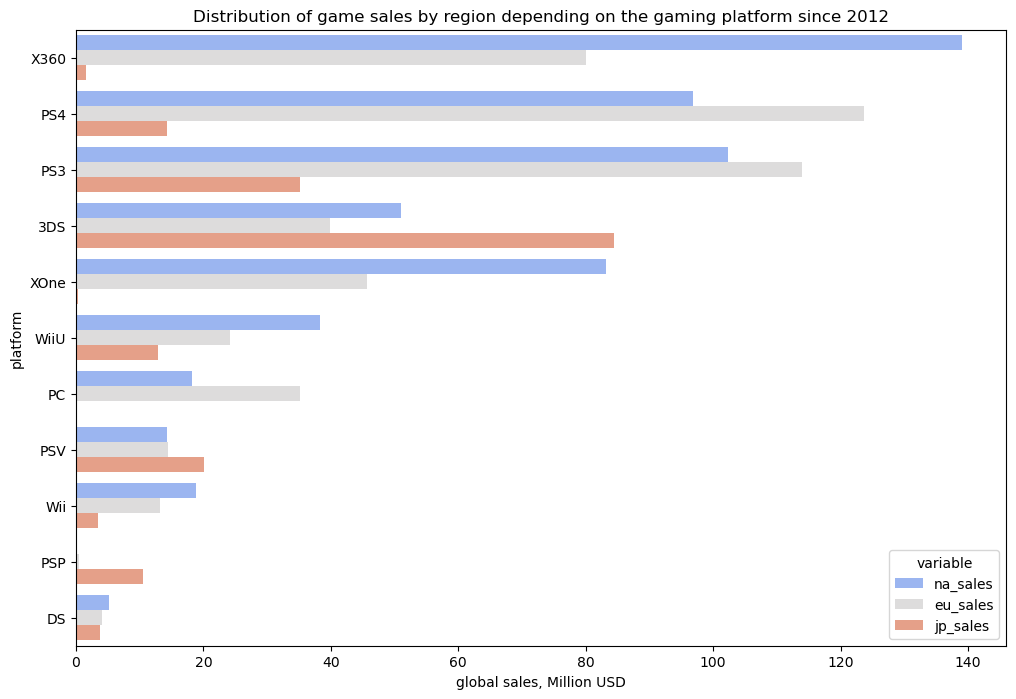

In [93]:
# figure size
plt.figure(figsize=(12, 8))

# setting parameters for plotting a graph
ax = sns.barplot(y=df_4_region.platform,
                 x=df_4_region.value,
                 orient='h',
                 color='red',
                 palette='coolwarm',
                 hue=df_4_region.variable);

# axis labels and titles
plt.xlabel('global sales, Million USD')
plt.title('Distribution of game sales by region depending on the gaming platform since 2012');

The list of Top 5 platforms is as follows:

PS4
X360
PS3
XOne
3DS
Note that in the European market the most popular platforms are from the manufacturer Sony (PS4, PS3), while in North America the most popular gaming consoles are Microsoft (X360 and its successor XOne). In Japan, the most popular platform is the 3DS produced by the local company Nintendo.



Let's determine the most popular game genres by region

In [94]:
# get the required data slice
df_4_genre = df_4[['genre', 'na_sales', 'eu_sales', 'jp_sales']] \
    .groupby('genre', as_index=False) \
    .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
    .melt(id_vars=['genre']) \
    .sort_values('value', ascending=False)

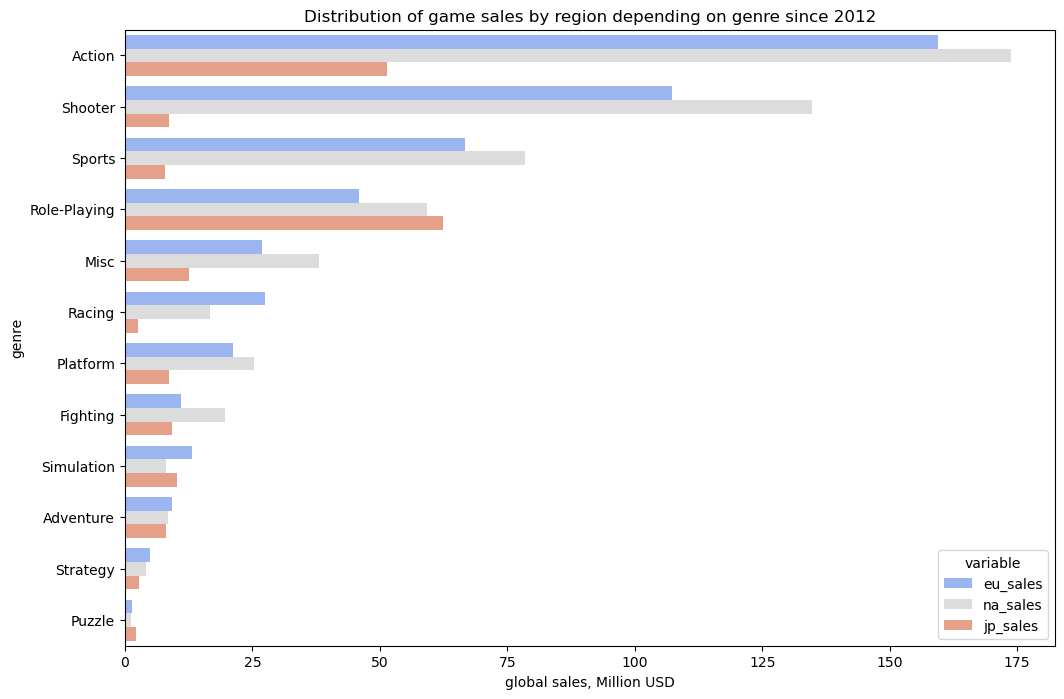

In [95]:
# figure size
plt.figure(figsize=(12, 8))

# setting parameters for plotting a graph
ax = sns.barplot(y=df_4_genre.genre,
                 x=df_4_genre.value,
                 orient='h',
                 color='#6925c2',
                 palette='coolwarm',
                 hue=df_4_genre.variable,
                 hue_order=['eu_sales', 'na_sales', 'jp_sales']);

# axis labels and titles
plt.xlabel('global sales, Million USD')
plt.title('Distribution of game sales by region depending on genre since 2012');

List of Top 5 most popular genres:

Action
Shooter
Sports
Role-Playing
Misc
Note that shooters are significantly less popular in Japan compared to Europe and North America. In Japan, the most popular genres are Role-Playing and Action. 

# General conclusions

- Half of all video games were released between 2007 and 2016;
- Global sales of released games peaked in 2008-2009. The video game industry is currently in decline;
- The life cycle of a video game platform is about 7-10 years;
- The promising platforms for the near future are: PS4, XOne and DS3;
- The most popular game genres over the past 5 years: Action, Shooter and Role-Playing;
- The majority of total revenue is generated by a small number of hit games, the sales of which are tens of times higher than the sales of other games;
- The portrait of a user in the North America and Europe regions does not differ much in preferences, while Asian consumers stand out both in their choice of platform and favorite genre. Therefore, it is worth taking into account the historical and cultural differences between regions, which are reflected directly in the preferences of users when doing business;